# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [1]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [2]:
import pandas as pd
import numpy as np

file_path = os.sep.join(data_path + ['Iris_data.csv'])
data = pd.read_csv(file_path, sep=',', header=0)

In [3]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [12]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


Fields are not too badly skewed.

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


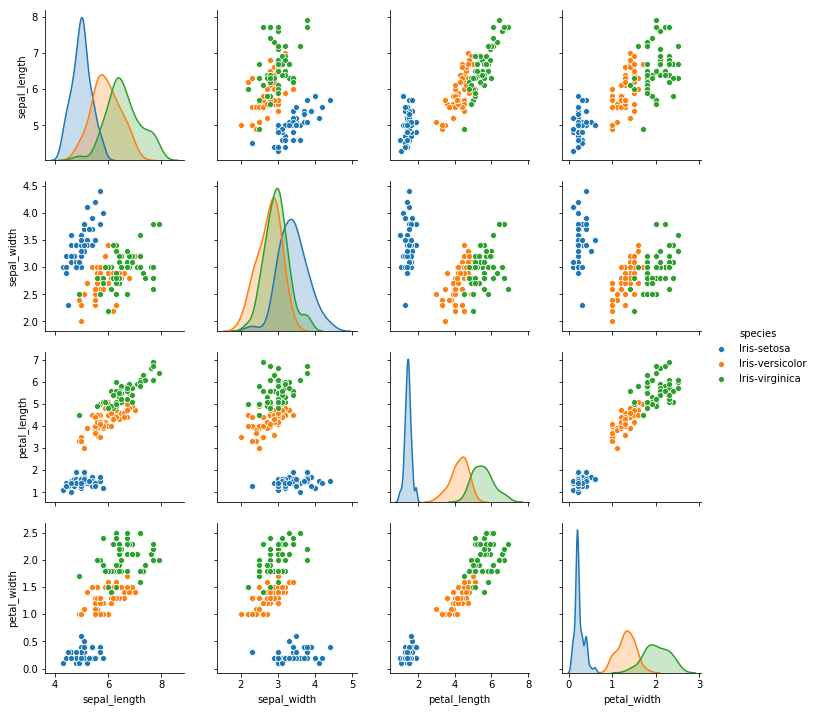

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [26]:
# From the histogram the features are continuous, so GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create the datasets
X = data[data.columns[:-1]]
y = data.species

# Create and instantiate the model
GNB = GaussianNB()
scores = cross_val_score(GNB, X, y, n_jobs=4, cv=4)
print(scores)

[0.94871795 0.94871795 0.91666667 1.        ]


In [27]:
np.mean(scores)

0.953525641025641

In [29]:
say = dict()
say

{}

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [32]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
X = data[data.columns[:-1]]
y = data.species

nb = {'gaussian':GaussianNB(),
      'bernoulli':BernoulliNB(),
      'multinomial':MultinomialNB()}

Cv_n = 4
scores = dict()
for key, model in nb.items():
    s = cross_val_score(model, X, y, n_jobs=Cv_n, cv=Cv_n)
    scores[key] = np.mean(s)
    
scores

{'gaussian': 0.953525641025641,
 'bernoulli': 0.3333333333333333,
 'multinomial': 0.9529914529914529}

Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

In [33]:
# Bernoulli distribution is built for two outcome expirements

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [35]:
# Visually the petal_features do seperate the data intuitively.
X = data[['sepal_width', 'sepal_length']]
y = data.species

nb = {'gaussian':GaussianNB(),
      'bernoulli':BernoulliNB(),
      'multinomial':MultinomialNB()}

scores = dict()

for key, model in nb.items():
    s = cross_val_score(model, X, y, n_jobs=Cv_n, cv=Cv_n)
    scores[key] = np.mean(s)
    
scores
    

{'gaussian': 0.7879273504273504,
 'bernoulli': 0.3333333333333333,
 'multinomial': 0.6800213675213675}

#Come up with your observations after taking away the very predictive features, which model works better

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


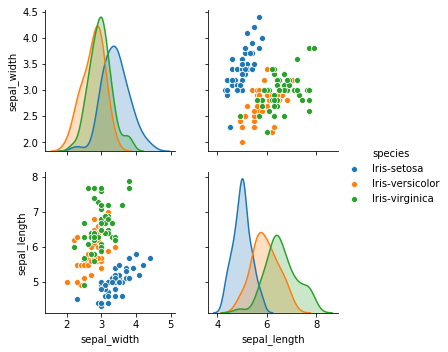

In [37]:
# 1. Guassian is still the best but with reduced accuracy.
# 2. Plotting a pairplot to see the new distribution

X = data[['sepal_width', 'sepal_length', 'species']]
sns.pairplot(X, hue='species')

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

[Text(0,0.5,'Cross Validation Score'),
 Text(0.5,0,'Number of extra copies of "sepal_length"'),
 Text(0.5,1,'Decline in Naive Bayes Performance')]

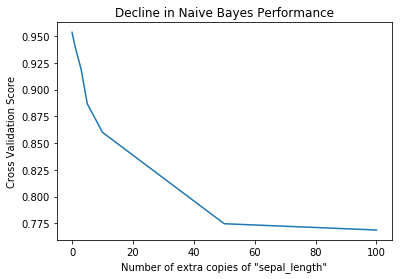

In [46]:
X = data[data.columns[:-1]]
y = data.species

# Number of copies
n_copies = [0, 1, 3, 5, 10, 50, 100]

def create_copies_of_sepal_lengths(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['Sepal_length_copy%s' %i] = X['sepal_length']
    return X_new

def get_cross_value_scores(n):
    X_new = create_copies_of_sepal_lengths(X,n)
    s = cross_val_score(GaussianNB(), X_new, y, cv=Cv_n, n_jobs=Cv_n)
    return np.mean(s)

avg_scores = pd.Series([get_cross_value_scores(n) for n in n_copies], index=n_copies)

ax = avg_scores.plot()
ax.set(xlabel='Number of extra copies of "sepal_length"',
       ylabel='Cross Validation Score',
       title='Decline in Naive Bayes Performance')

## Question 6 - Naive Bayes on Human Activity Recongnition

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset. 
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [49]:
data_path = ['data']
file_path = os.sep.join(data_path+['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(file_path, sep=',', header=0)

X = data[data.columns[:-1]]
y = data.Activity

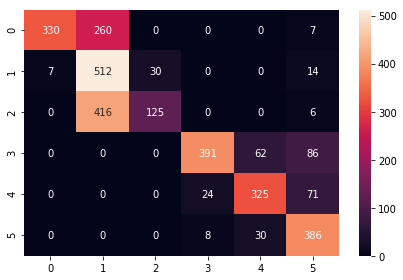

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Creating the training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

GNB = GaussianNB().fit(X_train, y_train)
cm = confusion_matrix(y_test, GNB.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()

In [56]:
score = np.mean(cross_val_score(GNB, X, y, cv=Cv_n, n_jobs=Cv_n))
score

0.7500897671070889

## Question 7

Now, let's discretize the dataset from Question 6. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

a. Create `X_discrete` from `X` using .rank(pct=True)

b. Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)

c. Split `X_discrete` and `y` into training and test datasets

d. Fit a MultinomialNB to the training split.

e. Get predictions on the test set.

f. Plot the confusion matrix for predictions.

In [59]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.267383,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417


In [57]:
X_discrete = X.rank(pct=True)

In [60]:
X_discrete

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.752209,0.339839,0.162152,0.151762,0.194194,0.462181,0.185164,0.192640,0.450529,0.265948,...,0.186717,0.547238,0.490339,0.259928,0.525002,0.261773,0.491407,0.194776,0.495097,0.348092
1,0.565006,0.556559,0.226333,0.016992,0.262258,0.370619,0.008447,0.266822,0.379454,0.044956,...,0.540247,0.181183,0.208078,0.621614,0.481115,0.173124,0.915234,0.184484,0.496262,0.357608
2,0.618118,0.366929,0.357316,0.146422,0.314011,0.251966,0.112341,0.335275,0.264103,0.182299,...,0.887659,0.430916,0.406447,0.254782,0.674143,0.547723,0.956112,0.169919,0.497330,0.371104
3,0.598505,0.231479,0.228954,0.109816,0.191669,0.086222,0.082629,0.197009,0.112341,0.182299,...,0.878920,0.747160,0.753860,0.372560,0.474027,0.784154,0.195359,0.170599,0.499854,0.377221
4,0.473250,0.545393,0.324012,0.020099,0.218079,0.089426,0.020682,0.228566,0.092436,0.063064,...,0.415283,0.479755,0.507428,0.727935,0.624818,0.802505,0.127391,0.172735,0.510050,0.389358
5,0.501796,0.759103,0.617147,0.050879,0.093310,0.015341,0.051267,0.094475,0.015147,0.063064,...,0.304884,0.238761,0.244101,0.675211,0.348189,0.633945,0.264783,0.167589,0.509079,0.396738
6,0.610448,0.361686,0.449558,0.073017,0.314108,0.204583,0.087970,0.323527,0.202156,0.109185,...,0.516943,0.643363,0.682688,0.187785,0.283426,0.498107,0.373046,0.160598,0.500631,0.392854
7,0.513351,0.182154,0.212642,0.089135,0.315565,0.223323,0.113895,0.321876,0.204583,0.109185,...,0.500243,0.775124,0.798815,0.411302,0.882707,0.224391,0.806972,0.163317,0.505195,0.397514
8,0.506457,0.307117,0.254005,0.051267,0.340616,0.197980,0.052626,0.361103,0.185261,0.122633,...,0.782212,0.583261,0.671133,0.515196,0.581901,0.360229,0.593067,0.172347,0.522478,0.410525
9,0.647636,0.761627,0.590349,0.172347,0.280998,0.158947,0.171764,0.276435,0.165744,0.139382,...,0.719584,0.956695,0.965628,0.411788,0.361006,0.253811,0.454413,0.171376,0.525973,0.419167


In [62]:
X_discrete = X_discrete.applymap(lambda x: float(np.format_float_positional(x,1)))

In [63]:
X_discrete

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.8,0.3,0.2,0.2,0.2,0.5,0.2,0.2,0.5,0.3,...,0.2,0.5,0.5,0.3,0.5,0.3,0.5,0.2,0.5,0.3
1,0.6,0.6,0.2,0.0,0.3,0.4,0.0,0.3,0.4,0.0,...,0.5,0.2,0.2,0.6,0.5,0.2,0.9,0.2,0.5,0.4
2,0.6,0.4,0.4,0.1,0.3,0.3,0.1,0.3,0.3,0.2,...,0.9,0.4,0.4,0.3,0.7,0.5,1.0,0.2,0.5,0.4
3,0.6,0.2,0.2,0.1,0.2,0.1,0.1,0.2,0.1,0.2,...,0.9,0.7,0.8,0.4,0.5,0.8,0.2,0.2,0.5,0.4
4,0.5,0.5,0.3,0.0,0.2,0.1,0.0,0.2,0.1,0.1,...,0.4,0.5,0.5,0.7,0.6,0.8,0.1,0.2,0.5,0.4
5,0.5,0.8,0.6,0.1,0.1,0.0,0.1,0.1,0.0,0.1,...,0.3,0.2,0.2,0.7,0.3,0.6,0.3,0.2,0.5,0.4
6,0.6,0.4,0.4,0.1,0.3,0.2,0.1,0.3,0.2,0.1,...,0.5,0.6,0.7,0.2,0.3,0.5,0.4,0.2,0.5,0.4
7,0.5,0.2,0.2,0.1,0.3,0.2,0.1,0.3,0.2,0.1,...,0.5,0.8,0.8,0.4,0.9,0.2,0.8,0.2,0.5,0.4
8,0.5,0.3,0.3,0.1,0.3,0.2,0.1,0.4,0.2,0.1,...,0.8,0.6,0.7,0.5,0.6,0.4,0.6,0.2,0.5,0.4
9,0.6,0.8,0.6,0.2,0.3,0.2,0.2,0.3,0.2,0.1,...,0.7,1.0,1.0,0.4,0.4,0.3,0.5,0.2,0.5,0.4


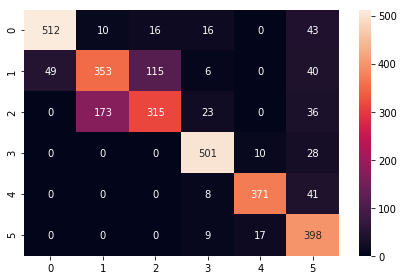

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Create the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.3, random_state=42)

# Fit the multinomial
MNB = MultinomialNB().fit(X_train, y_train)

# The Confusion Matrix
cm = confusion_matrix(y_test, MNB.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()

In [68]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.267383,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417


In [69]:
s = cross_val_score(MNB, X_discrete, y, n_jobs=Cv_n, cv=Cv_n)

In [ ]:
s